# Worksheet 2



In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## 1
Looking at the first step of Eulers method by talor expansion;
$$ y_{i+1} = y_i + y'_ih + \frac{y''_ih^2}{2}+..+\frac{y^{(n)}_ih^n}{n!}$$
For a differential equation of $\frac{dy}{dx} = f(x,y)$
$$ y_{i+1} = y_i + f(x_i,y_i)h + \frac{y''_ih^2}{2} + ...$$
If h << 1 then the $h^2$ part of the error will dominate as it will be the largest.
So the error on a single step scales with $h^2$ : $O(h^2)$ which we will call the local error

## 2 
The Global error is calculated by multiplying the local error by the number of steps.
The number of steps taken is proportional to $\frac{1}{h}$. Giving the error to be:
$$E_G = E_L . \frac{range}{h}$$
With $E_G$ being the total(Global) error, $E_L$ being the local error, $h$ being the step size and $range$ being the range we are integrating across.
$$E_G = O(h^2).\frac{1}{h} = O(h)$$

## 3(a)
$$\frac{dy}{dx}=y^2+1$$
$$\frac{dy}{y^2+1} = dx$$
$$\int_{}^{} \frac{dy}{y^2+1} = \int_{}^{} dx$$
$$tan^{-1}(y) = x+C$$
$$y = tan(x+C)$$
As $y(0) = 0$ $C=0$ So the solution is:
$$ y = tan(x)$$
$ y(\frac{\pi}{4}) = 1 $

## 3(b)

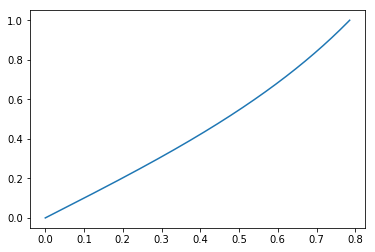

The solution for y(0.7853990000017472) is 1.0000009800579295 using 785398.1633974484 steps


In [66]:
def f(y): return 1+y**2
actual = 1
y = [0]
x = [0] 
dy = [1]
h = 0.000001
val = np.pi/4
n = val/h
i = 0
x_ = 0

while i <= n:
    i += 1
    x_ += h
    y_ = y[i-1] + dy[i-1]*h
    y.append(y_)
    x.append(x_)
    dy.append(f(y_))
plt.plot(x,y)
plt.show()
print('The solution for y({})'.format(x[-1]),'is {}'.format(y[-1]),'using {} steps'.format(n))


## 3(c)

In [29]:
error = actual - y[-1]
print(error)


-2.286910699478284e-06


## 5(a)
Differential of motion is :
$$ m\frac{d^2x}{dx^2} = −kx $$
$$u = x$$
$$u' = x' = v$$
$$v = x'$$
$$v'= x'' = \frac{-ku}{m}$$

## 5(b)
$$x = Acos(\omega t)$$


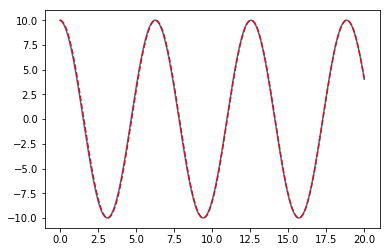

In [198]:
n = 500
t_total = 20
t = np.linspace(0, t_total, n)
dt = t_f/n
x = np.zeros([n+1])
x[0] = 10
v = np.zeros([n+1])
v[0] = 0

w=1/1

vel = []
pos = []

for i in range(1, n+1):
    
    k2x = h*(v[i-1] - dt*w*x[i-1]/2) 
    x[i] = x[i-1] + k2x
    
     
    k2v = dt*w*(-x[i-1] - h*v[i-1]/2) 
    v[i] = v[i-1] + k2v 
    
    vel.append(v[i])
    pos.append(x[i])

def f(t,w,A):
    return A*np.cos(w*t)

plt.plot(t,pos)
plt.plot(t,f(t,w,x[0]),'r--')
plt.show()

In [142]:
#Spring Constant
k = 1.0
#Mass
m = 0.02
#Angular frequency squared
w = k/m

period = 2*np.pi*(np.sqrt(1/w))

#Initial Conditions
x_start = 1.0
v_start = 0.0

#Set loop variables
x_position = x_start
velocity = v_start

#Step Size
dt = 0.001

#Arrays to store variable values
x_plot = []
v_plot = []
time = []

#Plot the numerically determined position over
# the time interval 1 to 10 seconds in steps of 0.1
for t in np.arange(1,100,0.1):

    #The two equations below are used in the Euler Method approach
    #Their solution's period, which can be plotted, varies depending on the step size
    # and I know it shouldn't
    #x_position = x_position + dt*velocity
    #velocity = velocity - dt*w*x_position

    #The equations below are used for RK2 method. I don't know why I cant get it to work.
    velocity = velocity + dt*(-w*x_position)
    k2_x = dt*(velocity + (-w*x_position*dt/2.0))
    x_position = x_position + k2_x

    k2_v = -dt*w*(x_position + velocity*dt/2.0)
    velocity = velocity + k2_v


    x_plot.append(x_position)
    v_plot.append(velocity)
    time.append(t)

def f(t):
    A = 1
    w = 1/1
    return A*np.cos(w*t)


u = f(time)

#print(time)
plt.plot(time,x_plot)
#plt.show

TypeError: can't multiply sequence by non-int of type 'float'

[]


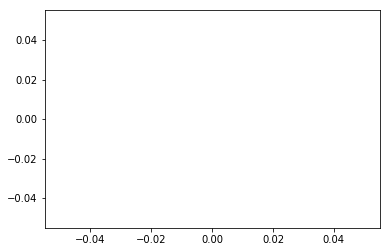

In [39]:
def f(t,u): 
    return -u/5
dt = 0.1
totalT = 10
steps = totalT/dt -1
t = np.arange(0,totalT,dt)
t0 = 0
y0 = [10,0]
runge = RK45(f,t0,y0,t_bound=10,max_step=0.1)
y = []
t = []
for i in range(len(t)):
    runge.step()
    y.append(runge.y)
    t.append(runge.t)
    print(runge.t)
print(y)
plt.plot(t,y)

[  0.    0.1   0.2 ...  99.9 100.  100. ]
[1.00000000e+01 9.51229425e+00 9.04837418e+00 ... 2.02763898e-21
 1.92874986e-21 1.92874986e-21]


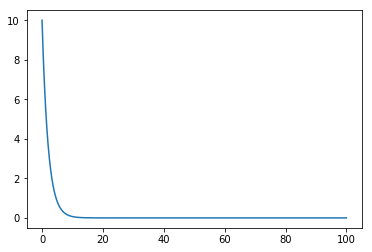

In [54]:
def f(t,u): 
    return -u/2
dt = 0.1
totalT = 10
steps = totalT/dt -1
t = np.arange(0,totalT,dt)
t0 = [0,100]
y0 = [10,0]
runge = solve_ivp(f,t0,y0,method='RK45',max_step=0.1)
print(runge.t)
print(runge.y[0])
plt.plot(runge.t,runge.y[0])
plt.show()